# Heart Disease prediction

<h1 style="color:red">Introduction

<img src="hEART_dIS.jpg"></img>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
heart = pd.read_csv('Datasets/final_heart_disease_dataSet.csv')

In [3]:
heart.head().style.set_properties(**{'background-color': '#b9e192',
'color': 'black',
'border-color': 'darkblack'})

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,937,65,0,2,140,417,1,0,157,0,0.800000,2,1,2,1
1,289,55,0,0,128,205,0,2,130,1,2.000000,1,1,3,0
2,93,54,0,1,132,288,1,0,159,1,0.000000,2,1,2,1
3,134,41,0,1,126,306,0,1,163,0,0.000000,2,0,2,1
4,444,43,1,0,115,303,0,1,181,0,1.200000,1,0,2,1


oldpeak: ST depression induced by exercise relative to rest (‘ST’ relates to positions on the ECG plot. See more here)

slope: the slope of the peak exercise ST segment — 0: downsloping; 1: flat; 2: upsloping

ca: The number of major vessels (0–3)

thal: A blood disorder called thalassemia Value 0: NULL (dropped from the dataset previously
Value 1: fixed defect (no blood flow in some part of the heart)
Value 2: normal blood flow
Value 3: reversible defect (a blood flow is observed but it is not normal)

target: Heart disease (1 = no, 0= yes)

In [4]:
heart.shape

(1212, 15)

<h1 style='color:red'> Attributes </h1>

<ul>
<li><h3>Age</h3></li>
    <br/>
<li><h3>Sex</h3></li>
     <br/>
<li><h3>ChestPainType</h3></li>
 <br/>
    <li><h3>trestbps:</h3> The Persons Resting BP [mm Hg]</li>
 <br/>
    <li><h3>Cholesterol:</h3> Serum cholesterol [mm/dl]</li>
 <br/>
    <li><h3>FastingBS:</h3> Fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]</li>
 <br/>
    <li><h3>RestingECG:</h3> Resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST
elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria] </li>
<br/>
    <li><h3>(thalch)MaxHR:</h3> Maximum heart rate achieved [Numeric value between 60 and 202]</li>
<br/>
    <li><h3>ExerciseAngina:</h3> Exercise-induced angina [True, False]</li>
<br/>
    <li><h3>Oldpeak:</h3> Oldpeak = ST [Numeric value measured in depression]</li>
<br/>
    <li><h3>ST_Slope:</h3> The slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]</li>
<br/>
    <li><h3>ca</h3></li>
<br/>
    <li><h3>thal:</h3> People with thalassemia can get too much iron in their bodies, either from the disease or from frequent blood transfusions. Too much iron can result in damage to your heart, liver and endocrine system, which includes hormone-producing glands that regulate processes throughout your body.</li>
</ul>

In [5]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1212 entries, 0 to 1211
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1212 non-null   int64  
 1   age         1212 non-null   int64  
 2   sex         1212 non-null   int64  
 3   cp          1212 non-null   int64  
 4   trestbps    1212 non-null   int64  
 5   chol        1212 non-null   int64  
 6   fbs         1212 non-null   int64  
 7   restecg     1212 non-null   int64  
 8   thalach     1212 non-null   int64  
 9   exang       1212 non-null   int64  
 10  oldpeak     1212 non-null   float64
 11  slope       1212 non-null   int64  
 12  ca          1212 non-null   int64  
 13  thal        1212 non-null   int64  
 14  target      1212 non-null   int64  
dtypes: float64(1), int64(14)
memory usage: 142.2 KB


In [6]:
heart = heart.drop(labels='Unnamed: 0',axis=1)

In [7]:
heart['thal'].unique()

array([2, 3, 1, 0])

In [8]:
heart.describe().style.set_properties(**{'background-color': '#b9e192',
'color': 'black',
'border-color': 'darkblack'})

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.070845,0.465433,1.030773,17.516406,51.766511,0.355756,0.525208,22.876772,0.469212,1.159636,0.615462,1.021339,0.611518,0.498217
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.000000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [9]:
heart.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [10]:
heart['age'].value_counts()

age
58    76
57    68
54    64
59    56
52    52
51    48
60    44
56    44
44    44
62    44
41    40
64    40
63    36
67    36
61    32
55    32
65    32
45    32
42    32
53    32
43    32
46    28
66    28
48    28
50    28
49    20
47    20
39    16
68    16
35    16
70    16
38    12
69    12
71    12
40    12
34     8
37     8
77     4
29     4
76     4
74     4
Name: count, dtype: int64

In [18]:
t = heart.iloc[:,0].value_counts()

In [19]:
t = t.reset_index()

In [20]:
t

,age,count
0,58,76
1,57,68
2,54,64
3,59,56
4,52,52
5,51,48
6,60,44
7,56,44
8,44,44
9,62,44


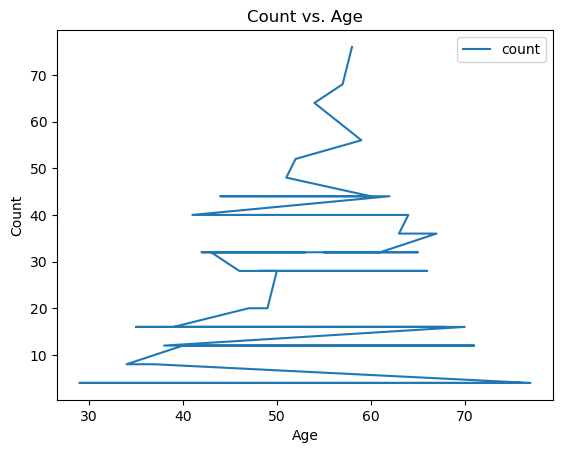

In [21]:
t.plot(x='age', y='count', kind='line')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Count vs. Age')
plt.show()

In [22]:
Women = heart[heart['sex'] == 0]["target"]
rate_women = (Women.sum()/len(Women)).round(2)*100
print("Percentage of Women with probability of HeartDisease:", rate_women,"%")
Men = heart.loc[heart['sex'] == 1]["target"]
rate_men = (Men.sum()/len(Men)).round(2)*100
print("Percentage of Men with probability of HeartDisease :", rate_men,"%")

Percentage of Women with probability of HeartDisease: 75.0 %
Percentage of Men with probability of HeartDisease : 45.0 %


# Diabetes Prediction

<img src="Diabets.jpeg"></img>

In [23]:
DB = pd.read_csv('Datasets/final_diabetes_disease_dataSet.csv')

In [24]:
DB.head().style.set_properties(**{'background-color': '#b9e192',
'color': 'black',
'border-color': 'darkblack'})

,Unnamed: 0,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,148,72,35,0,33.600000,0.627000,50,1
1,1,85,66,29,0,26.600000,0.351000,31,0
2,2,183,64,0,0,23.300000,0.672000,32,1
3,3,89,66,23,94,28.100000,0.167000,21,0
4,4,137,40,35,168,43.100000,2.288000,33,1


In [25]:
DB = DB.drop(labels='Unnamed: 0',axis=1)

In [26]:
DB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Glucose                   768 non-null    int64  
 1   BloodPressure             768 non-null    int64  
 2   SkinThickness             768 non-null    int64  
 3   Insulin                   768 non-null    int64  
 4   BMI                       768 non-null    float64
 5   DiabetesPedigreeFunction  768 non-null    float64
 6   Age                       768 non-null    int64  
 7   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 48.1 KB


In [27]:
DB.describe().style.set_properties(**{'background-color': '#b9e192',
'color': 'black',
'border-color': 'darkblack'})

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [28]:
DB.isnull().sum()

Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [29]:
DB['Age'].value_counts()

Age
22    72
21    63
25    48
24    46
23    38
28    35
26    33
27    32
29    29
31    24
41    22
30    21
37    19
42    18
33    17
38    16
36    16
32    16
45    15
34    14
46    13
43    13
40    13
39    12
35    10
50     8
51     8
52     8
44     8
58     7
47     6
54     6
49     5
48     5
57     5
53     5
60     5
66     4
63     4
62     4
55     4
67     3
56     3
59     3
65     3
69     2
61     2
72     1
81     1
64     1
70     1
68     1
Name: count, dtype: int64

<h1 style='color:red'>Attributes</h1>

<ul>
<li>Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test</li>
<li>BloodPressure: Diastolic blood pressure (mm Hg)</li>
<li>SkinThickness: Triceps skin fold thickness (mm)</li>
<li>Insulin: 2-Hour serum insulin (mu U/ml)</li>
<li>BMI: Body mass index (weight in kg/(height in m)^2)</li>
<li>DiabetesPedigreeFunction: Diabetes pedigree function</li>
<li>Age: Age (years)</li>
<li>Outcome: Class variable (0 or 1)</li>
</ul>

# Final Feature Selection

## Heart Dataset

In [30]:
heart.head().style.set_properties(**{'background-color': '#b9e192',
'color': 'black',
'border-color': 'darkblack'})

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,65,0,2,140,417,1,0,157,0,0.800000,2,1,2,1
1,55,0,0,128,205,0,2,130,1,2.000000,1,1,3,0
2,54,0,1,132,288,1,0,159,1,0.000000,2,1,2,1
3,41,0,1,126,306,0,1,163,0,0.000000,2,0,2,1
4,43,1,0,115,303,0,1,181,0,1.200000,1,0,2,1


In [31]:
new_Heart_Dataset = heart[['age','sex','cp','thalach','oldpeak','exang','slope','ca','thal','target']]

In [32]:
new_Heart_Dataset.shape

(1212, 10)

In [33]:
heart.corr().style.set_properties(**{'background-color': '#b9e192',
'color': 'black',
'border-color': 'darkblack'})

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


In [34]:
new_Heart_Dataset.corr().style.set_properties(**{'background-color': '#b9e192',
'color': 'black',
'border-color': 'darkblack'})

,age,sex,cp,thalach,oldpeak,exang,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,-0.398522,0.210013,0.096801,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.044020,0.096093,0.141664,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.295762,-0.149230,-0.394280,0.119717,-0.181053,-0.161736,0.433798
thalach,-0.398522,-0.044020,0.295762,1.000000,-0.344187,-0.378812,0.386784,-0.213177,-0.096439,0.421741
oldpeak,0.210013,0.096093,-0.149230,-0.344187,1.000000,0.288223,-0.577537,0.222682,0.210244,-0.430696
exang,0.096801,0.141664,-0.394280,-0.378812,0.288223,1.000000,-0.257748,0.115739,0.206754,-0.436757
slope,-0.168814,-0.030711,0.119717,0.386784,-0.577537,-0.257748,1.000000,-0.080155,-0.104764,0.345877
ca,0.276326,0.118261,-0.181053,-0.213177,0.222682,0.115739,-0.080155,1.000000,0.151832,-0.391724
thal,0.068001,0.210041,-0.161736,-0.096439,0.210244,0.206754,-0.104764,0.151832,1.000000,-0.344029
target,-0.225439,-0.280937,0.433798,0.421741,-0.430696,-0.436757,0.345877,-0.391724,-0.344029,1.000000


## Diabetes

In [35]:
DB.corr().style.set_properties(**{'background-color': '#b9e192',
'color': 'black',
'border-color': 'darkblack'})

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Glucose,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [36]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [37]:
new_Heart_Dataset['target'].value_counts()

target
1    660
0    552
Name: count, dtype: int64

In [38]:
DB['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [39]:
X_heart = new_Heart_Dataset.drop(columns='target',axis=1)
Y_heart = new_Heart_Dataset['target']

In [40]:
X_heart

,age,sex,cp,thalach,oldpeak,exang,slope,ca,thal
0,65,0,2,157,0.8,0,2,1,2
1,55,0,0,130,2.0,1,1,1,3
2,54,0,1,159,0.0,1,2,1,2
3,41,0,1,163,0.0,0,2,0,2
4,43,1,0,181,1.2,0,1,0,2
...,...,...,...,...,...,...,...,...,...
1207,58,1,2,165,0.0,0,2,0,2
1208,42,1,0,178,0.0,0,2,0,2
1209,65,0,2,151,0.8,0,2,0,2
1210,54,1,2,165,1.6,0,2,0,3


In [41]:
Y_heart

0       1
1       0
2       1
3       1
4       1
       ..
1207    1
1208    1
1209    1
1210    1
1211    1
Name: target, Length: 1212, dtype: int64

In [42]:
X_train_h,X_test_h,Y_train_h,Y_test_h = train_test_split(X_heart,Y_heart,test_size=0.2)

In [43]:
X_train_h.shape

(969, 9)

In [44]:
X_test_h.shape

(243, 9)

In [45]:
Y_train_h.shape

(969,)

In [46]:
Y_test_h.shape

(243,)

<h2>Model Training</h2>

In [60]:
model = LogisticRegression()

In [85]:
# Training logistic regression model on tranning data
model.fit(X_train_h,Y_train_h)

/home/anurag10/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [62]:
# Model Evaluation
X_train_prediction = model.predict(X_test_h)
X_train_data_accuracy = accuracy_score(X_train_prediction,Y_test_h)

In [63]:
X_train_data_accuracy

0.8765432098765432

In [64]:
input_data_h = (41,0,1,172,0,1.4,2,0,2)

In [65]:
# change i/p data to numpy array
input_data_h_as_numpy = np.asarray(input_data_h)

In [66]:
# reshape the numpy array as we are predicting for only on one data point
input_data_h_reshape = input_data_h_as_numpy.reshape(1,-1)

In [67]:
input_data_h_reshape

array([[ 41. ,   0. ,   1. , 172. ,   0. ,   1.4,   2. ,   0. ,   2. ]])

In [68]:
prediction_of_heart = model.predict(input_data_h_reshape)

/home/anurag10/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [69]:
prediction_of_heart

array([1])

In [117]:
if prediction_of_heart[0]==1:
    print("the person does not have heart Disease")
else:
    print("the person has heart Disease")

the person does not have heart Disease


# DECISION TREE

In [118]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier

from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

# Create Decision Tree classifer object
clf = DecisionTreeClassifier()
# Train Decision Tree Classifer
clf = clf.fit(X_train_h,Y_train_h)
#Predict the response for test dataset
y_pred = clf.predict(X_test_h)
print("Accuracy:",metrics.accuracy_score(y_pred,Y_test_h))

Accuracy: 1.0


In [72]:
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)
# Train Decision Tree Classifer
clf = clf.fit(X_train_h,Y_train_h)
#Predict the response for test dataset
y_pred = clf.predict(X_test_h)
print("Accuracy:",metrics.accuracy_score(Y_test_h, y_pred))

Accuracy: 0.8189300411522634


# Diabetes dataset  

In [86]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

In [87]:
DB.groupby('Outcome').mean()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,
0,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [88]:
X_d = DB.drop(columns='Outcome',axis=1)
Y_d = DB['Outcome']

In [89]:
X_d

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,148,72,35,0,33.6,0.627,50
1,85,66,29,0,26.6,0.351,31
2,183,64,0,0,23.3,0.672,32
3,89,66,23,94,28.1,0.167,21
4,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...
763,101,76,48,180,32.9,0.171,63
764,122,70,27,0,36.8,0.340,27
765,121,72,23,112,26.2,0.245,30
766,126,60,0,0,30.1,0.349,47


In [90]:
Y_d

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [91]:
X_train_d,X_text_d,Y_train_d,Y_test_d = train_test_split(X_d,Y_d,test_size=0.2,stratify=Y_d)

In [92]:
 X_train_d.shape

(614, 7)

In [93]:
X_text_d.shape

(154, 7)

In [94]:
Y_train_d.shape

(614,)

In [95]:
Y_test_d.shape

(154,)

# Model Training

In [96]:
classifier = svm.SVC(kernel='linear')

In [97]:
classifier.fit(X_train_d,Y_train_d)

SVC(kernel='linear')

In [98]:
X_test_prediction_d = classifier.predict(X_train_d)
training_data_accuracy_d = accuracy_score(X_test_prediction_d,Y_train_d)

In [99]:
training_data_accuracy_d

0.7947882736156352

In [100]:
input_data_d = (102,76,37,0,32.9,0.67,46)
# change i/p data to numpy array
input_data_d_as_numpy = np.asarray(input_data_d)

In [101]:
# reshape the numpy array as we are predicting for only on one data point
input_data_d_reshape = input_data_d_as_numpy.reshape(1,-1)

In [102]:
input_data_d_reshape

array([[102.  ,  76.  ,  37.  ,   0.  ,  32.9 ,   0.67,  46.  ]])

In [103]:
prediction_of_diabetes = classifier.predict(input_data_d_reshape)
print(prediction_of_diabetes)

[0]


/home/anurag10/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [104]:
if prediction_of_diabetes[0]==0:
    print("the person does not have diabetic Disease")
else:
    print("the person has diabetic Disease")

the person does not have diabetic Disease


# Random Forest

In [111]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train_d, Y_train_d)

RandomForestClassifier(n_estimators=200)

In [116]:
from sklearn.metrics import accuracy_score

y_pred = rfc.predict(X_text_d)
accuracy = accuracy_score(Y_test_d, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7077922077922078


In [77]:
import pickle

In [78]:
filename = 'diabetes_model.sav'
pickle.dump(classifier, open(filename, 'wb'))

In [79]:
#loaded_model = pickle.load(open('diabetes_model.sav', 'rb'))

In [80]:
filename = 'heart_disease_model.sav'
pickle.dump(model, open(filename, 'wb'))

In [81]:
#loaded_model = pickle.load(open('heart_disease_model.sav', 'rb'))

In [ ]:
pip install streamlit-option-menu